In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [2]:
test_file = r'C:\Users\JIN\Desktop\machine\homework1\生成TFRecord文件\homework_\test.tfrecord'
train_file = r'C:\Users\JIN\Desktop\machine\homework1\生成TFRecord文件\homework_\train.tfrecord'

In [3]:
def read_and_decode(filename=train_file): # 读入train.tfrecords
    #读取文件
    filename_queue = tf.train.string_input_producer(["train.tfrecords"])#生成一个queue队列
    reader = tf.TFRecordReader()
    _, serialized_example = reader.read(filename_queue)#返回文件名和文件
    features = tf.parse_single_example(serialized_example,
    features={
        'label': tf.FixedLenFeature([], tf.int64),
        'iamge_raw' : tf.FixedLenFeature([28,28], tf.float32),
    })#将image数据和label取出来
	
    img = tf.cast(features['iamge_raw'], tf.float64)
    #img = tf.reshape(img, [28, 28])  #reshape为28*28的图片
    
    label = tf.cast(features['label'], tf.int32) #在流中抛出label张量
    return img, label

In [39]:
img, label = read_and_decode(train_file)

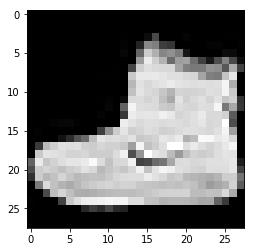

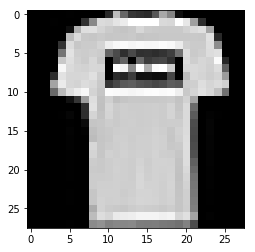

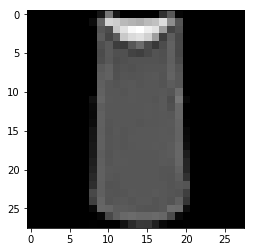

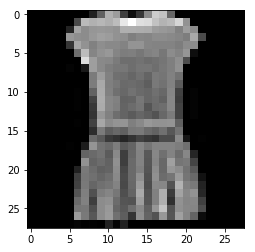

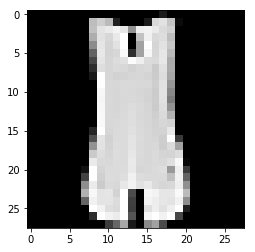

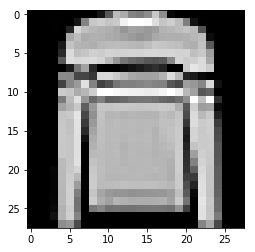

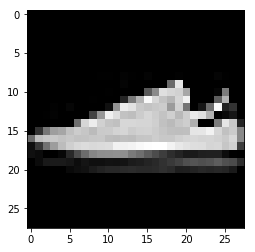

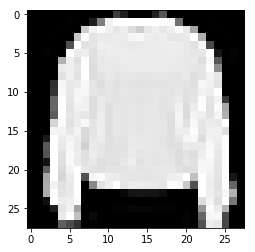

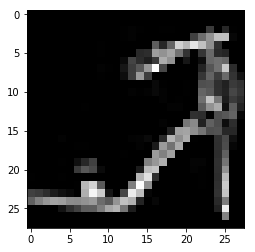

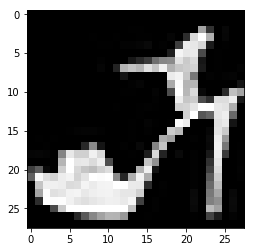

In [42]:
with tf.Session() as sess: # 開始一個對話
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    coord=tf.train.Coordinator()
    threads= tf.train.start_queue_runners(coord=coord)
    for i in range(10):
        example, l = sess.run([img,label]) # 在會話中取出image和label數據
        #print(example, l)
        imm = Image.fromarray(example)
        plt.imshow(imm)
        plt.show(imm)
    coord.request_stop()
    coord.join(threads)